In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load image paths
nir_path = r'C:\Users\cptsc\OneDrive\Desktop\ComputerScience\FYP\Histograms\2025-04-15_14-13-00_nir.jpg'
rgb_path = r'C:\Users\cptsc\OneDrive\Desktop\ComputerScience\FYP\Histograms\2025-04-15_14-13-00_rgb.jpg'

# load images in color
nir_color = cv2.imread(nir_path, cv2.IMREAD_COLOR)
rgb_bgr = cv2.imread(rgb_path, cv2.IMREAD_COLOR)

# extract channels
b, g, r = cv2.split(rgb_bgr)
_, _, nir_red = cv2.split(nir_color)

# flip NIR red channel to align it
nir_red = cv2.flip(nir_red, 0)
nir_red = cv2.flip(nir_red, 1)

In [ ]:
# method to zoom and crop the NIR red channel to match the RGB shape, this aligns the images
def zoom_crop(image, base_shape, zoom, offset_y, offset_x):
    # get original image dimensions
    h, w = image.shape[:2]
    base_h, base_w = base_shape[:2]

    # calculate the crop size based on zoom factor
    crop_h = int(base_h / zoom)
    crop_w = int(base_w / zoom)

    # calculate the center of the image
    center_y = h // 2 + offset_y
    center_x = w // 2 + offset_x

    # ensure the center is within the bounds of the image
    center_y = np.clip(center_y, crop_h // 2, h - crop_h // 2)
    center_x = np.clip(center_x, crop_w // 2, w - crop_w // 2)

    # define the crop area
    start_y = center_y - crop_h // 2
    end_y = center_y + crop_h // 2
    start_x = center_x - crop_w // 2
    end_x = center_x + crop_w // 2
    
    # crop and resize back to base_shape
    cropped = image[start_y:end_y, start_x:end_x]
    resized = cv2.resize(cropped, (base_w, base_h), interpolation=cv2.INTER_AREA)
    return resized

# align NIR red channel to RGB shape
nir_red = zoom_crop(nir_red, r.shape, zoom=2.4, offset_x=80, offset_y=0)

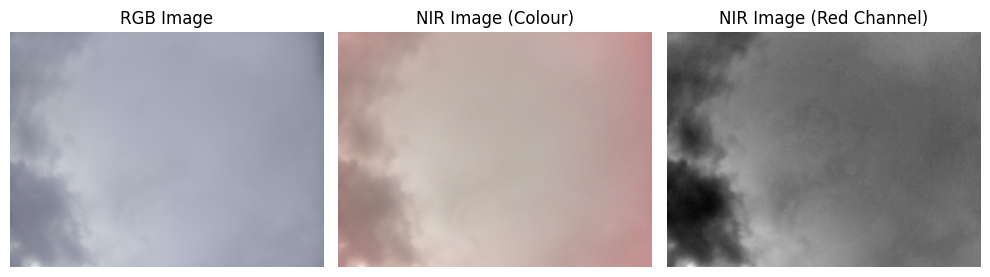

In [67]:
temp_nir_colour = cv2.imread(nir_path, cv2.IMREAD_COLOR)
temp_nir_colour = cv2.flip(temp_nir_colour, 0)
temp_nir_colour = cv2.flip(temp_nir_colour, 1)

temp_nir_colour = zoom_crop(temp_nir_colour, r.shape, zoom=2.4, offset_x=80, offset_y=0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rgb_bgr, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(temp_nir_colour, cv2.COLOR_BGR2RGB))
plt.title("NIR Image (Colour)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nir_red, cmap='gray')
plt.title("NIR Image (Red Channel)")
plt.axis('off')

plt.tight_layout()
plt.show()


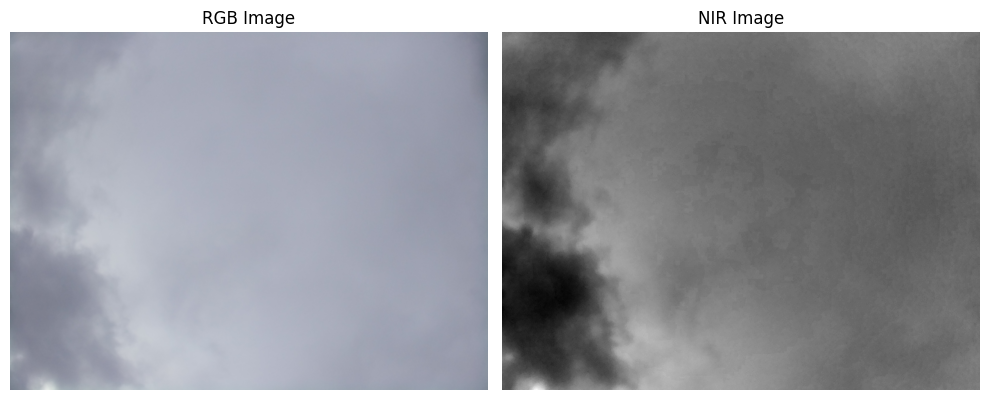

In [60]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_bgr, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nir_red, cmap='gray')
plt.title("NIR Image")
plt.axis('off')

plt.tight_layout()
plt.show()

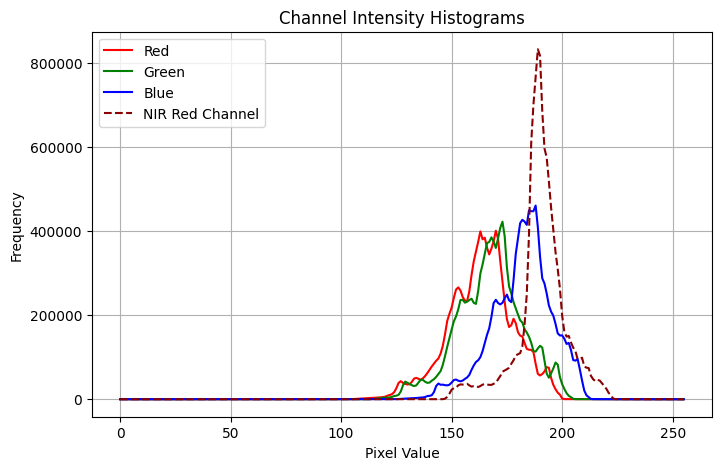

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(cv2.calcHist([r], [0], None, [256], [0, 256]), label='Red', color='red')
plt.plot(cv2.calcHist([g], [0], None, [256], [0, 256]), label='Green', color='green')
plt.plot(cv2.calcHist([b], [0], None, [256], [0, 256]), label='Blue', color='blue')
plt.plot(cv2.calcHist([nir_red], [0], None, [256], [0, 256]), label='NIR Red Channel', color='darkred', linestyle='--')
plt.title("Channel Intensity Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

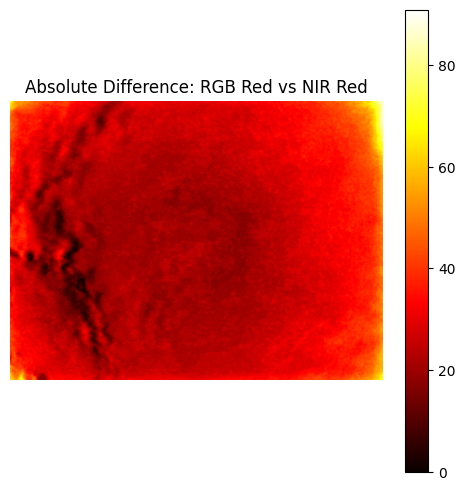

In [37]:
diff = cv2.absdiff(r, nir_red)
plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='hot')
plt.title("Absolute Difference: RGB Red vs NIR Red")
plt.colorbar()
plt.axis('off')
plt.show()

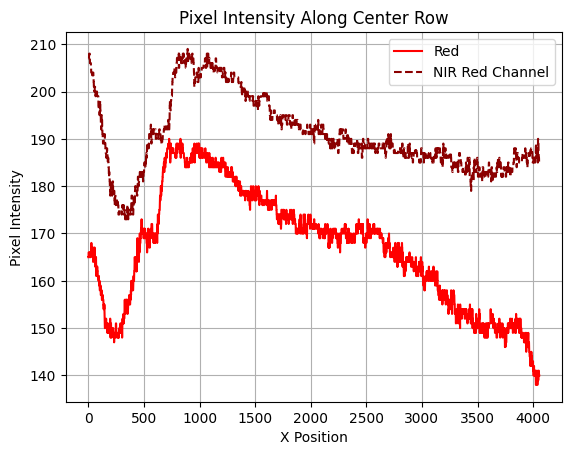

In [38]:
y = r.shape[0] // 2
plt.plot(r[y, :], label='Red', color='red')
plt.plot(nir_red[y, :], label='NIR Red Channel', color='darkred', linestyle='--')
plt.title("Pixel Intensity Along Center Row")
plt.xlabel("X Position")
plt.ylabel("Pixel Intensity")
plt.legend()
plt.grid(True)
plt.show()

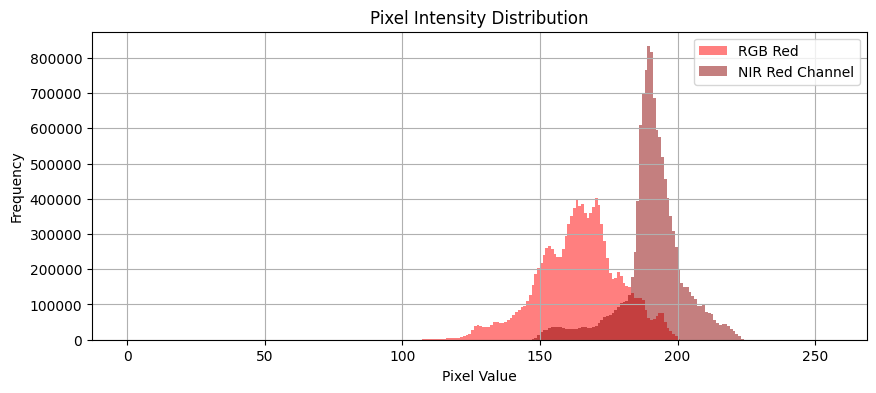

In [54]:
plt.figure(figsize=(10, 4))
plt.hist(r.flatten(), bins=256, range=(0, 256), color='red', alpha=0.5, label='RGB Red')
plt.hist(nir_red.flatten(), bins=256, range=(0, 256), color='darkred', alpha=0.5, label='NIR Red Channel')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


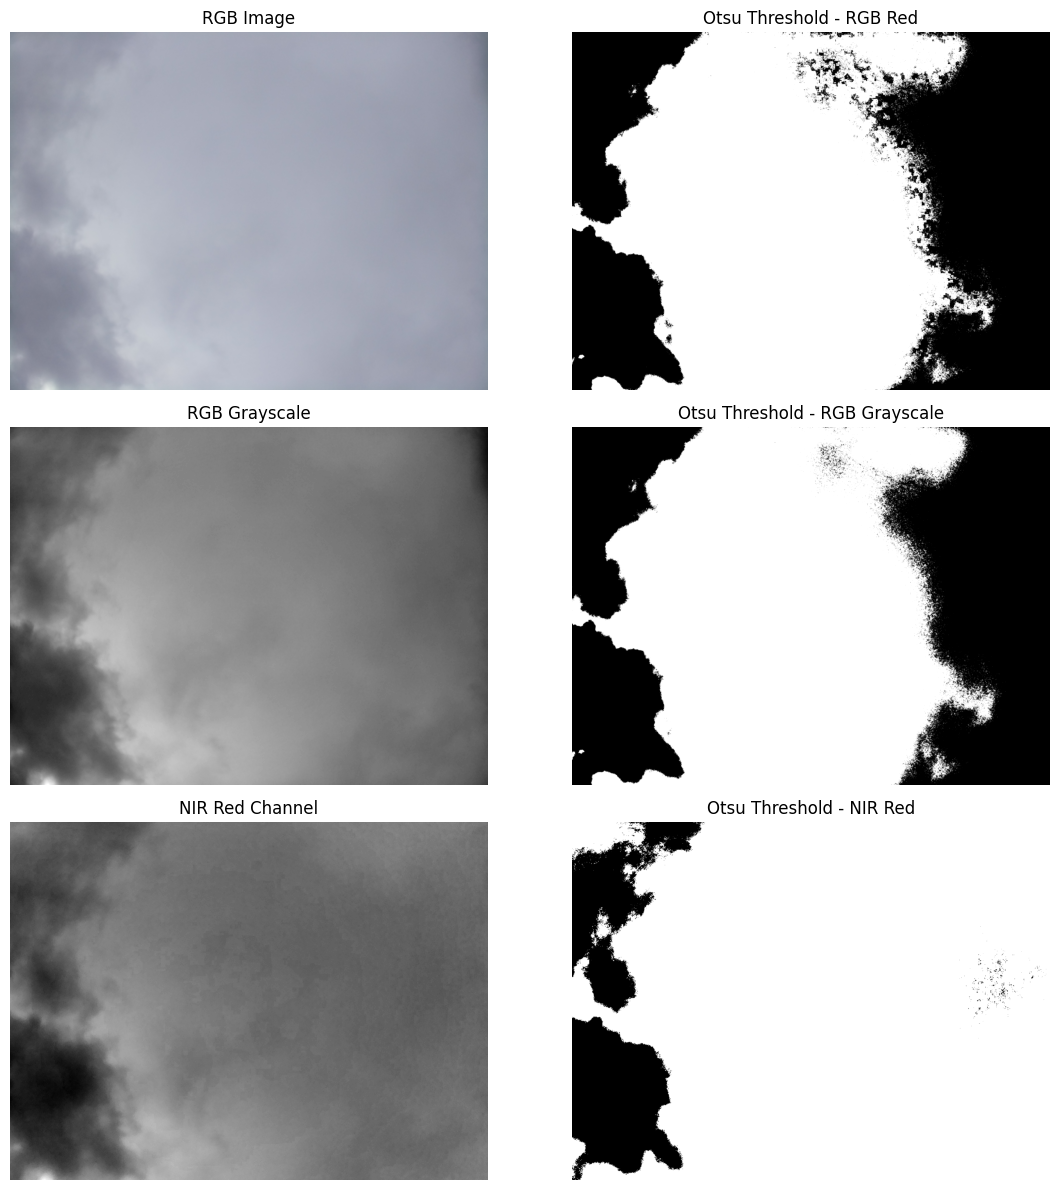

In [ ]:
rgb_gray = cv2.cvtColor(rgb_bgr, cv2.COLOR_BGR2GRAY)

# Otsu's method automatically selects an optimal threshold to separate bright regions (clouds) from darker regions (sky)
_, otsu_thresh_rgb_red = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_thresh_rgb_gray = cv2.threshold(rgb_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_thresh_nir = cv2.threshold(nir_red, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# display results in a 3x2 Grid
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(rgb_bgr, cv2.COLOR_BGR2RGB))
plt.title("RGB Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(otsu_thresh_rgb_red, cmap='gray')
plt.title("Otsu Threshold - RGB Red")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(rgb_gray, cmap='gray')
plt.title("RGB Grayscale")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(otsu_thresh_rgb_gray, cmap='gray')
plt.title("Otsu Threshold - RGB Grayscale")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(nir_red, cmap='gray')
plt.title("NIR Red Channel")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(otsu_thresh_nir, cmap='gray')
plt.title("Otsu Threshold - NIR Red")
plt.axis('off')

plt.tight_layout()
plt.show()